In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles # For generating non-linear data

# 1. Data Generation (Creating the "Moons" or "Circles" dataset)
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1) # Unsqueeze for binary cross-entropy

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: torch.Size([800, 2])
Test data shape: torch.Size([200, 2])


In [4]:
## Define the Model
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleClassifier, self).__init__()

        # Layer 1: Input to Hidden (using ReLU activation)
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()

        # Layer 2: Hidden to Output (no activation yet, will be applied in loss)
        self.layer_2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Pass input through the first linear layer and ReLU
        x = self.relu(self.layer_1(x))

        # Pass through the final output layer
        x = self.layer_2(x)
        return x

# Hyperparameters
INPUT_SIZE = X_train.shape[1]  # 2 features (x1, x2)
HIDDEN_SIZE = 10              # A small number of neurons
OUTPUT_SIZE = 1               # 1 for binary classification
LEARNING_RATE = 0.01

# Instantiate the model
model = SimpleClassifier(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
print("\nModel Structure:")
print(model)


Model Structure:
SimpleClassifier(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)


In [5]:
# 3. Define Loss Function and Optimizer

# For binary classification, we use Binary Cross-Entropy with Logits
# BCEWithLogitsLoss combines Sigmoid activation with the BCELoss,
# making it more stable numerically.
criterion = nn.BCEWithLogitsLoss()

# Optimizer: Adam is a good starting point
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# 4. Training Loop
EPOCHS = 500
print("\nStarting Training...")

for epoch in range(EPOCHS):
    # Set the model to training mode
    model.train()

    # 1. Forward Propagation: Get the prediction (logits)
    outputs = model(X_train)

    # 2. Calculate Loss
    loss = criterion(outputs, y_train)

    # 3. Backpropagation: Zero the gradients, compute gradients, and update weights
    optimizer.zero_grad() # Clear previous gradients
    loss.backward()       # Compute gradients (backprop)
    optimizer.step()      # Update weights (optimization step)

    # Print status every 50 epochs
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {loss.item():.4f}')

print("Training finished!")


Starting Training...
Epoch [50/500], Loss: 0.5493
Epoch [100/500], Loss: 0.3327
Epoch [150/500], Loss: 0.1861
Epoch [200/500], Loss: 0.1172
Epoch [250/500], Loss: 0.0823
Epoch [300/500], Loss: 0.0622
Epoch [350/500], Loss: 0.0501
Epoch [400/500], Loss: 0.0422
Epoch [450/500], Loss: 0.0364
Epoch [500/500], Loss: 0.0318
Training finished!


In [6]:
# 5. Evaluation
model.eval() # Set the model to evaluation mode (turns off dropout, etc.)

with torch.no_grad(): # Disable gradient calculation for faster inference
    # Get predictions (logits)
    test_outputs = model(X_test)

    # Apply Sigmoid to logits to get probabilities
    probabilities = torch.sigmoid(test_outputs)

    # Convert probabilities to binary predictions (0 or 1)
    predictions = (probabilities > 0.5).float()

    # Calculate accuracy
    correct = (predictions == y_test).sum().item()
    total = y_test.size(0)
    accuracy = correct / total

print(f"\nModel Accuracy on Test Set ({total} samples): **{accuracy * 100:.2f}%**")


Model Accuracy on Test Set (200 samples): **97.00%**


neural_network_visualizations.png


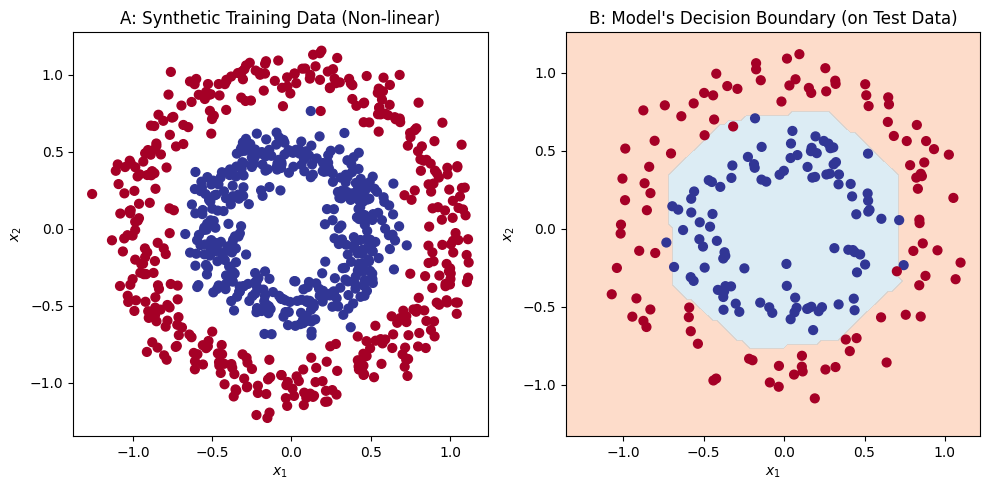

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

# 1. Data Generation
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# 2. Model Definition
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleClassifier, self).__init__()
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.layer_2(x)
        return x

# Hyperparameters
INPUT_SIZE = X_train.shape[1]
HIDDEN_SIZE = 10
OUTPUT_SIZE = 1
LEARNING_RATE = 0.01
EPOCHS = 500

# Instantiate the model
model = SimpleClassifier(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# 3. Training Loop
for epoch in range(EPOCHS):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# --- Visualization 1: The Dataset ---
plt.figure(figsize=(10, 5))

# Plotting the Training Data
plt.subplot(1, 2, 1)
# Convert tensors back to numpy for plotting
X_train_np = X_train.numpy()
y_train_np = y_train.numpy().flatten()
plt.scatter(X_train_np[:, 0], X_train_np[:, 1], c=y_train_np, cmap=plt.cm.RdYlBu, s=40)
plt.title("A: Synthetic Training Data (Non-linear)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# --- Visualization 2: Decision Boundary ---

# Create a meshgrid to cover the entire feature space
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare the grid data for the model
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_tensor = torch.tensor(mesh_points, dtype=torch.float32)

# Make predictions on the grid
model.eval()
with torch.no_grad():
    Z_logits = model(mesh_tensor)
    # Convert logits to probabilities and then to binary class (0 or 1)
    Z = torch.sigmoid(Z_logits).squeeze().numpy() > 0.5

# Reshape Z back to the grid dimensions
Z = Z.reshape(xx.shape)

# Plotting the Decision Boundary
plt.subplot(1, 2, 2)
# Contour plot of the boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
# Scatter plot of the Test Data, colored by true class
X_test_np = X_test.numpy()
y_test_np = y_test.numpy().flatten()
plt.scatter(X_test_np[:, 0], X_test_np[:, 1], c=y_test_np, cmap=plt.cm.RdYlBu, s=40)
plt.title("B: Model's Decision Boundary (on Test Data)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.savefig("neural_network_visualizations.png")
print("neural_network_visualizations.png")

Epoch [100/500], Loss: 0.4095
Epoch [200/500], Loss: 0.1189
Epoch [300/500], Loss: 0.0569
Epoch [400/500], Loss: 0.0353
Epoch [500/500], Loss: 0.0256

Final Test Accuracy: 97.50%


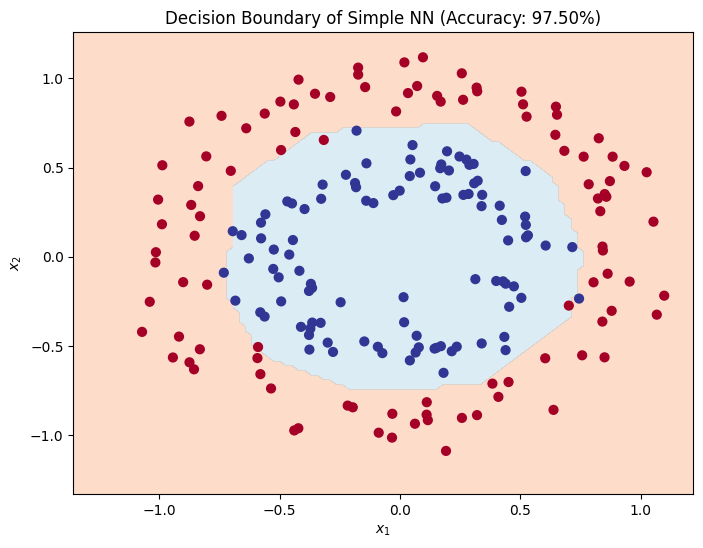

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

# ----------------------------------------------------------------------
## 1. Data Generation and Preparation (The Scratch)
# ----------------------------------------------------------------------
# Create a non-linear dataset (concentric circles)
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Convert to PyTorch tensors and reshape y for loss function
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Hyperparameters
INPUT_SIZE = X_train.shape[1]  # 2 features
HIDDEN_SIZE = 10
OUTPUT_SIZE = 1
LEARNING_RATE = 0.01
EPOCHS = 500

# ----------------------------------------------------------------------
## 2. Model Definition and Setup
# ----------------------------------------------------------------------
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleClassifier, self).__init__()
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.layer_2(x)
        return x

# Instantiate Model, Loss, and Optimizer
model = SimpleClassifier(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# ----------------------------------------------------------------------
## 3. Training (Learning)
# ----------------------------------------------------------------------
for epoch in range(EPOCHS):
    model.train()

    # Forward pass
    outputs = model(X_train)

    # Calculate Loss
    loss = criterion(outputs, y_train)

    # Backpropagation and optimization step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {loss.item():.4f}')

# ----------------------------------------------------------------------
## 4. Evaluation and Visualization
# ----------------------------------------------------------------------
model.eval()
with torch.no_grad():
    # --- A. Evaluation ---
    test_outputs = model(X_test)
    predictions = (torch.sigmoid(test_outputs) > 0.5).float()
    accuracy = (predictions == y_test).sum().item() / y_test.size(0)
    print(f"\nFinal Test Accuracy: {accuracy * 100:.2f}%")

    # --- B. Visualization (Decision Boundary) ---
    plt.figure(figsize=(8, 6))

    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Prepare mesh points for prediction
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_tensor = torch.tensor(mesh_points, dtype=torch.float32)

    # Predict on grid and reshape
    Z_logits = model(mesh_tensor)
    Z = (torch.sigmoid(Z_logits).squeeze().numpy() > 0.5).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)

    # Plot test data points
    X_test_np = X_test.numpy()
    y_test_np = y_test.numpy().flatten()
    plt.scatter(X_test_np[:, 0], X_test_np[:, 1], c=y_test_np, cmap=plt.cm.RdYlBu, s=40)

    plt.title(f"Decision Boundary of Simple NN (Accuracy: {accuracy * 100:.2f}%)")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()

# The final image displayed by plt.show() will look similar to this:

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split
from collections import Counter
import random

# Set a random seed for reproducibility
torch.manual_seed(42)
random.seed(42)

# ----------------------------------------------------------------------
## 1. Data Generation and Preprocessing (The NLP Start)
# ----------------------------------------------------------------------
# 1.1 Synthetic Dataset (Small reviews and their sentiment labels)
reviews = [
    ("This movie was great and I loved the acting.", 1),
    ("The plot was confusing and the ending was bad.", 0),
    ("A fantastic experience, highly recommend.", 1),
    ("I hated every minute of this terrible show.", 0),
    ("It was okay, but nothing special.", 0),
    ("Truly an amazing film, a masterpiece.", 1),
    ("Terrible performance, absolute waste of money.", 0),
    ("Brilliant, outstanding, and a must-watch.", 1),
    ("The worst thing I have ever seen.", 0),
    ("So delightful and fun to watch.", 1)
]

# 1.2 Tokenization and Vocabulary Creation
# Tokenization: Splitting text into individual words
tokenized_data = [item[0].lower().split() for item in reviews]

# Create a vocabulary: count word frequency
word_counts = Counter(word for sentence in tokenized_data for word in sentence)

# Assign a unique integer index to each word
VOCAB = {word: i + 2 for i, (word, count) in enumerate(word_counts.most_common())}
VOCAB['<unk>'] = 1  # For unknown words
VOCAB['<pad>'] = 0  # For padding sequences

# Mapping: word -> index
TEXT_TO_INDEX = lambda text: [VOCAB.get(word, VOCAB['<unk>']) for word in text.lower().split()]

# Convert text data to numerical sequences
indexed_data = [
    (torch.tensor(TEXT_TO_INDEX(text), dtype=torch.long), torch.tensor([label], dtype=torch.float32))
    for text, label in reviews
]

# Separate features (sequences) and labels
sequences = [seq for seq, label in indexed_data]
labels = torch.cat([label for seq, label in indexed_data])

# Pad sequences: Necessary because RNNs need uniform input size per batch.
# pad_sequence adds the '<pad>' token (index 0) until all sequences are the length of the longest.
padded_sequences = pad_sequence(sequences, batch_first=True, padding_value=VOCAB['<pad>'])

# Split into training and testing sets (small dataset, so test size is small)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)

print(f"Vocab Size: {len(VOCAB)}")
print(f"Max Sequence Length: {X_train.size(1)}")
print(f"Example Padded Sequence (Indices):\n{X_train[0]}")

# ----------------------------------------------------------------------
## 2. Model Architecture (LSTM - The Context Keeper)
# ----------------------------------------------------------------------
class SentimentClassifier(nn.Module):
    # Initializes the network layers
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_size):
        super().__init__()

        # 1. Embedding Layer: Converts word indices (e.g., 5, 20, 1) into dense vectors.
        # This is where 'great' and 'fantastic' are mapped close together in vector space.
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # 2. LSTM (Long Short-Term Memory): The recurrent core.
        # It processes the sequence of embeddings and maintains an internal 'memory' (hidden state).
        # LSTM is powerful because it selectively remembers or forgets information from previous words.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, num_layers=1)

        # 3. Fully Connected (FC) Layer: Converts the final context vector to the final prediction.
        self.fc = nn.Linear(hidden_dim, output_size)

        # 4. Activation (Sigmoid): Output is compressed to a probability between 0 and 1.
        self.sigmoid = nn.Sigmoid()

    # Defines the forward pass of data through the network
    def forward(self, text):
        # text shape: [batch_size, sequence_length]

        # 1. Embeddings: Converts word indices into vectors
        embedded = self.embedding(text)
        # embedded shape: [batch_size, sequence_length, embedding_dim]

        # 2. LSTM Pass: The LSTM processes the sequence
        # output: all hidden states across time steps (unused for simple classification)
        # (hidden, cell): the final hidden and cell state (the summary of the entire sentence)
        _, (hidden, cell) = self.lstm(embedded)

        # We use the final hidden state from the last layer (first dimension is num_layers)
        final_hidden = hidden.squeeze(0)
        # final_hidden shape: [batch_size, hidden_dim] - This vector is the 'sentiment summary'

        # 3. Final Classification Layer
        output = self.fc(final_hidden)
        # output shape: [batch_size, output_size] (Raw logits)

        # 4. Sigmoid for final probability (0 to 1)
        return output

# Hyperparameters
EMBEDDING_DIM = 50
HIDDEN_DIM = 100
OUTPUT_SIZE = 1 # Binary Classification

model = SentimentClassifier(len(VOCAB), EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_SIZE)
criterion = nn.BCEWithLogitsLoss() # Standard for binary classification (includes Sigmoid)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# ----------------------------------------------------------------------
## 3. Training and Evaluation
# ----------------------------------------------------------------------
EPOCHS = 50

print("\n--- Starting Training ---")
for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()

    # Forward Pass
    predictions = model(X_train)

    # Calculate Loss (Error)
    loss = criterion(predictions, y_train.unsqueeze(1))

    # Backpropagation
    loss.backward()

    # Weight Update
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    test_predictions_logits = model(X_test)

    # Convert logits to probabilities (0-1) and then to binary class (0 or 1)
    probabilities = torch.sigmoid(test_predictions_logits)
    predictions = (probabilities > 0.5).float()

    # Calculate Accuracy
    correct = (predictions == y_test.unsqueeze(1)).sum().item()
    total = y_test.size(0)
    accuracy = correct / total

print("\n--- Final Evaluation ---")
print(f"Test Samples: {total}")
print(f"Correct Predictions: {correct}")
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

# ----------------------------------------------------------------------
## 4. Final Explainability Example
# ----------------------------------------------------------------------
new_review = "This was truly excellent and amazing, so much fun."
indexed_review = torch.tensor([TEXT_TO_INDEX(new_review)], dtype=torch.long)
# Pad the new review to the same max length as the training data
padding_needed = X_train.size(1) - indexed_review.size(1)
if padding_needed > 0:
    padding = torch.zeros((1, padding_needed), dtype=torch.long)
    final_input = torch.cat([indexed_review, padding], dim=1)
else:
    final_input = indexed_review

model.eval()
with torch.no_grad():
    prediction_logit = model(final_input)
    final_probability = torch.sigmoid(prediction_logit).item()
    predicted_class = 1 if final_probability > 0.5 else 0

print(f"\n--- Prediction Example ---")
print(f"Review: '{new_review}'")
print(f"Prediction Probability (Class 1 - Positive): {final_probability:.4f}")
print(f"Predicted Sentiment: {'POSITIVE (1)' if predicted_class == 1 else 'NEGATIVE (0)'}")

# Explainability: The model is successful because the LSTM summarizes the sequence,
# giving high weight to words like 'excellent', 'amazing', and 'fun' (learned via embeddings)
# and integrating that positivity into its final hidden state (the sentiment summary).

Vocab Size: 53
Max Sequence Length: 9
Example Padded Sequence (Indices):
tensor([ 7, 10,  2, 11,  3,  5, 12,  4, 13])

--- Starting Training ---
Epoch [10/50], Loss: 0.0020
Epoch [20/50], Loss: 0.0001
Epoch [30/50], Loss: 0.0000
Epoch [40/50], Loss: 0.0000
Epoch [50/50], Loss: 0.0000

--- Final Evaluation ---
Test Samples: 3
Correct Predictions: 1
Final Test Accuracy: 33.33%

--- Prediction Example ---
Review: 'This was truly excellent and amazing, so much fun.'
Prediction Probability (Class 1 - Positive): 1.0000
Predicted Sentiment: POSITIVE (1)


Shape of Embeddings before t-SNE: (52, 50)


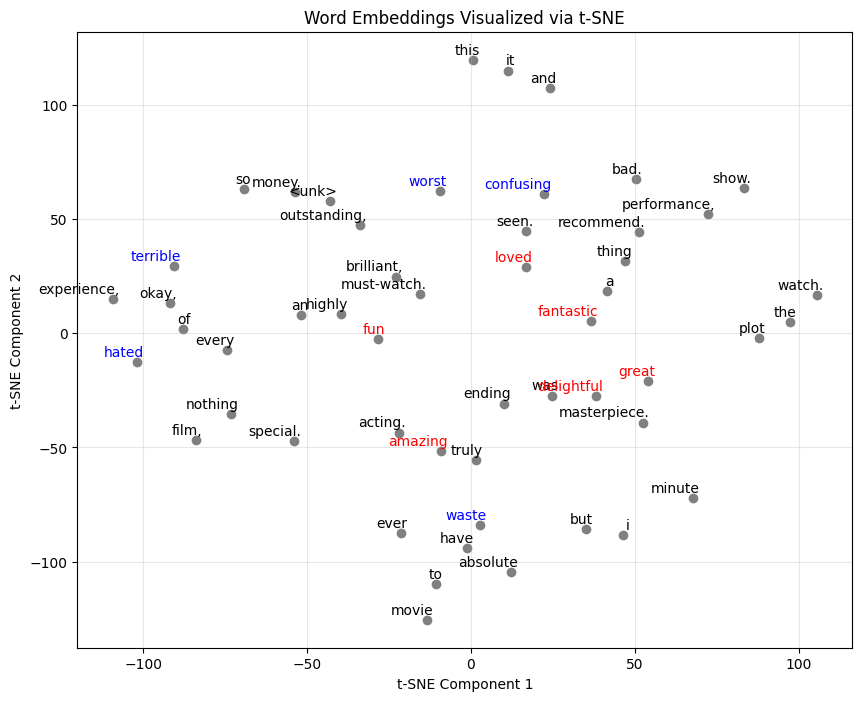

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# --- Reusing Model and VOCAB from previous snippet ---
# NOTE: This code assumes the 'model' and 'VOCAB' variables from the
# end-to-end sentiment classification code are still in memory.

# 1. Extract the Embedding Weights
# The embedding layer weights are the learned vectors for each word.
embedding_weights = model.embedding.weight.data.numpy()

# Exclude the <pad> token (index 0) from visualization
# Its vector is typically zeroed out and distorts the plot.
embeddings_to_plot = embedding_weights[1:]

# Create a list of words corresponding to the plotted vectors
# We skip index 0 ('<pad>').
reverse_vocab = {v: k for k, v in VOCAB.items()}
words_to_plot = [reverse_vocab[i] for i in range(1, len(VOCAB))]

print(f"Shape of Embeddings before t-SNE: {embeddings_to_plot.shape}")

# 2. Dimensionality Reduction using t-SNE
# t-SNE is a common tool for visualizing high-dimensional data by mapping it to 2D/3D.
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
# Note: Perplexity should be smaller than the number of data points.
embeddings_2d = tsne.fit_transform(embeddings_to_plot)

# 3. Plotting
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='gray')

for i, word in enumerate(words_to_plot):
    x, y = embeddings_2d[i, :]

    # Color-code for better insight
    color = 'red' if word in ['great', 'fantastic', 'amazing', 'brilliant', 'delightful', 'excellent', 'fun', 'loved'] else \
            'blue' if word in ['confusing', 'bad', 'hated', 'terrible', 'worst', 'waste'] else 'black'

    plt.annotate(word,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 color=color,
                 fontsize=10)

plt.title("Word Embeddings Visualized via t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True, alpha=0.3)
plt.show()



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 571kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.54MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.59MB/s]


Starting GAN Training...
Epoch [1/50], Step [100/938], Loss D: 0.7908, Loss G: 1.3506
Epoch [1/50], Step [200/938], Loss D: 1.7635, Loss G: 0.9593
Epoch [1/50], Step [300/938], Loss D: 2.6842, Loss G: 0.9494
Epoch [1/50], Step [400/938], Loss D: 0.1325, Loss G: 3.8865
Epoch [1/50], Step [500/938], Loss D: 0.2263, Loss G: 3.4849
Epoch [1/50], Step [600/938], Loss D: 1.1500, Loss G: 1.6612
Epoch [1/50], Step [700/938], Loss D: 0.1326, Loss G: 3.9766
Epoch [1/50], Step [800/938], Loss D: 1.3549, Loss G: 0.9800
Epoch [1/50], Step [900/938], Loss D: 0.2208, Loss G: 3.3278
Epoch [2/50], Step [100/938], Loss D: 0.2836, Loss G: 3.4901
Epoch [2/50], Step [200/938], Loss D: 0.6074, Loss G: 1.8255
Epoch [2/50], Step [300/938], Loss D: 1.0868, Loss G: 1.1684
Epoch [2/50], Step [400/938], Loss D: 0.5681, Loss G: 1.9408
Epoch [2/50], Step [500/938], Loss D: 0.6695, Loss G: 2.1848
Epoch [2/50], Step [600/938], Loss D: 0.3172, Loss G: 2.5984
Epoch [2/50], Step [700/938], Loss D: 0.3161, Loss G: 3.6021

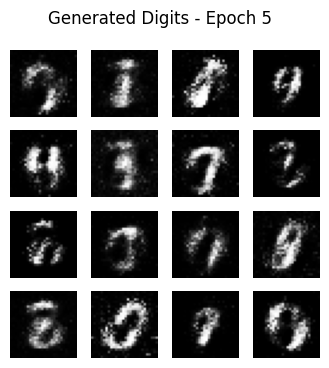

Epoch [6/50], Step [100/938], Loss D: 0.4547, Loss G: 3.6438
Epoch [6/50], Step [200/938], Loss D: 0.6790, Loss G: 2.1759
Epoch [6/50], Step [300/938], Loss D: 0.5997, Loss G: 2.7312
Epoch [6/50], Step [400/938], Loss D: 0.5967, Loss G: 2.1222
Epoch [6/50], Step [500/938], Loss D: 0.6876, Loss G: 2.3217
Epoch [6/50], Step [600/938], Loss D: 0.9080, Loss G: 2.2212
Epoch [6/50], Step [700/938], Loss D: 0.3498, Loss G: 2.8493
Epoch [6/50], Step [800/938], Loss D: 0.5703, Loss G: 2.6486
Epoch [6/50], Step [900/938], Loss D: 0.7188, Loss G: 2.6569
Epoch [7/50], Step [100/938], Loss D: 0.6553, Loss G: 1.9634
Epoch [7/50], Step [200/938], Loss D: 0.5433, Loss G: 2.4635
Epoch [7/50], Step [300/938], Loss D: 0.7442, Loss G: 1.6129
Epoch [7/50], Step [400/938], Loss D: 0.4192, Loss G: 2.6025
Epoch [7/50], Step [500/938], Loss D: 0.7651, Loss G: 2.2930
Epoch [7/50], Step [600/938], Loss D: 0.8297, Loss G: 2.5394
Epoch [7/50], Step [700/938], Loss D: 0.7240, Loss G: 1.5408
Epoch [7/50], Step [800/

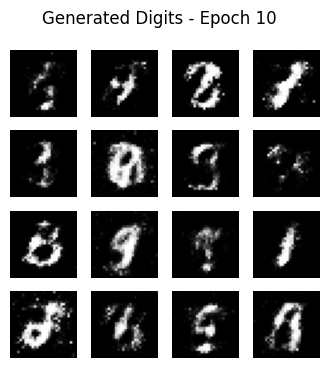

Epoch [11/50], Step [100/938], Loss D: 0.9704, Loss G: 1.8704
Epoch [11/50], Step [200/938], Loss D: 0.8575, Loss G: 1.8236
Epoch [11/50], Step [300/938], Loss D: 0.8211, Loss G: 1.7089
Epoch [11/50], Step [400/938], Loss D: 0.8002, Loss G: 1.4207
Epoch [11/50], Step [500/938], Loss D: 0.8968, Loss G: 1.6844
Epoch [11/50], Step [600/938], Loss D: 0.9871, Loss G: 1.9117
Epoch [11/50], Step [700/938], Loss D: 0.9762, Loss G: 1.6552
Epoch [11/50], Step [800/938], Loss D: 0.8901, Loss G: 1.6538
Epoch [11/50], Step [900/938], Loss D: 0.6912, Loss G: 1.6869
Epoch [12/50], Step [100/938], Loss D: 0.9147, Loss G: 1.5012
Epoch [12/50], Step [200/938], Loss D: 0.9551, Loss G: 1.8259
Epoch [12/50], Step [300/938], Loss D: 0.6504, Loss G: 2.6055
Epoch [12/50], Step [400/938], Loss D: 0.5857, Loss G: 2.0532
Epoch [12/50], Step [500/938], Loss D: 0.6375, Loss G: 2.3763
Epoch [12/50], Step [600/938], Loss D: 0.6124, Loss G: 1.7697
Epoch [12/50], Step [700/938], Loss D: 0.6393, Loss G: 1.8357
Epoch [1

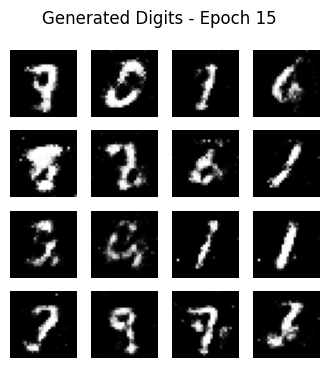

Epoch [16/50], Step [100/938], Loss D: 0.7775, Loss G: 1.8510
Epoch [16/50], Step [200/938], Loss D: 0.6609, Loss G: 1.9296
Epoch [16/50], Step [300/938], Loss D: 0.5745, Loss G: 1.8322
Epoch [16/50], Step [400/938], Loss D: 0.8718, Loss G: 1.7517
Epoch [16/50], Step [500/938], Loss D: 0.7082, Loss G: 1.6721
Epoch [16/50], Step [600/938], Loss D: 0.8260, Loss G: 1.9090
Epoch [16/50], Step [700/938], Loss D: 0.7914, Loss G: 1.6530
Epoch [16/50], Step [800/938], Loss D: 0.7925, Loss G: 2.5428
Epoch [16/50], Step [900/938], Loss D: 0.7774, Loss G: 1.5980
Epoch [17/50], Step [100/938], Loss D: 0.7471, Loss G: 1.7421
Epoch [17/50], Step [200/938], Loss D: 0.9086, Loss G: 1.5974
Epoch [17/50], Step [300/938], Loss D: 0.8169, Loss G: 1.5611
Epoch [17/50], Step [400/938], Loss D: 0.7178, Loss G: 2.1982
Epoch [17/50], Step [500/938], Loss D: 0.9450, Loss G: 1.3454
Epoch [17/50], Step [600/938], Loss D: 0.9394, Loss G: 1.8181
Epoch [17/50], Step [700/938], Loss D: 0.9477, Loss G: 1.3926
Epoch [1

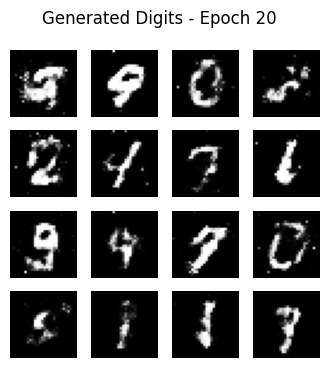

Epoch [21/50], Step [100/938], Loss D: 0.8766, Loss G: 1.6531
Epoch [21/50], Step [200/938], Loss D: 0.7489, Loss G: 1.9547
Epoch [21/50], Step [300/938], Loss D: 1.0742, Loss G: 1.4266
Epoch [21/50], Step [400/938], Loss D: 0.7741, Loss G: 1.6027
Epoch [21/50], Step [500/938], Loss D: 0.9579, Loss G: 1.4768
Epoch [21/50], Step [600/938], Loss D: 0.9684, Loss G: 1.5720
Epoch [21/50], Step [700/938], Loss D: 1.1566, Loss G: 1.8321
Epoch [21/50], Step [800/938], Loss D: 0.9702, Loss G: 1.5119
Epoch [21/50], Step [900/938], Loss D: 1.0539, Loss G: 1.3207
Epoch [22/50], Step [100/938], Loss D: 0.9600, Loss G: 1.6051
Epoch [22/50], Step [200/938], Loss D: 0.9284, Loss G: 1.3633
Epoch [22/50], Step [300/938], Loss D: 0.8648, Loss G: 1.5658
Epoch [22/50], Step [400/938], Loss D: 0.8909, Loss G: 1.8487
Epoch [22/50], Step [500/938], Loss D: 0.7959, Loss G: 1.4967
Epoch [22/50], Step [600/938], Loss D: 0.7875, Loss G: 1.3651
Epoch [22/50], Step [700/938], Loss D: 0.9635, Loss G: 1.6847
Epoch [2

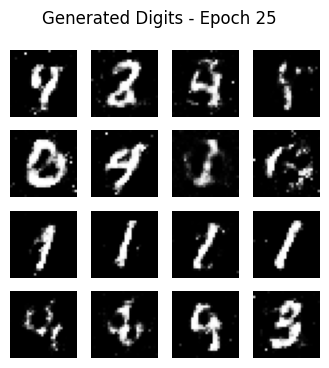

Epoch [26/50], Step [100/938], Loss D: 1.0023, Loss G: 1.2738
Epoch [26/50], Step [200/938], Loss D: 1.0387, Loss G: 1.1284
Epoch [26/50], Step [300/938], Loss D: 0.9786, Loss G: 1.6520
Epoch [26/50], Step [400/938], Loss D: 1.2587, Loss G: 1.2226
Epoch [26/50], Step [500/938], Loss D: 1.0658, Loss G: 1.2577
Epoch [26/50], Step [600/938], Loss D: 1.1182, Loss G: 1.3173
Epoch [26/50], Step [700/938], Loss D: 0.9943, Loss G: 1.3582
Epoch [26/50], Step [800/938], Loss D: 1.1180, Loss G: 1.3717
Epoch [26/50], Step [900/938], Loss D: 1.0882, Loss G: 1.5352
Epoch [27/50], Step [100/938], Loss D: 1.0908, Loss G: 1.2885
Epoch [27/50], Step [200/938], Loss D: 0.9361, Loss G: 1.5427
Epoch [27/50], Step [300/938], Loss D: 0.9017, Loss G: 1.3444
Epoch [27/50], Step [400/938], Loss D: 1.1682, Loss G: 1.3053
Epoch [27/50], Step [500/938], Loss D: 1.0319, Loss G: 1.6876
Epoch [27/50], Step [600/938], Loss D: 1.1784, Loss G: 1.1935
Epoch [27/50], Step [700/938], Loss D: 0.7915, Loss G: 1.5938
Epoch [2

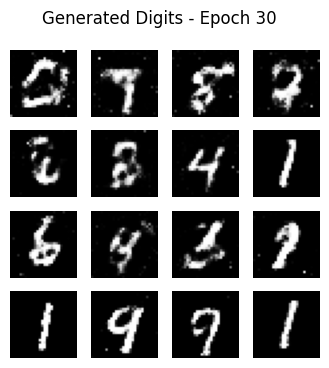

Epoch [31/50], Step [100/938], Loss D: 1.1601, Loss G: 1.4693
Epoch [31/50], Step [200/938], Loss D: 0.9163, Loss G: 1.1950
Epoch [31/50], Step [300/938], Loss D: 1.0548, Loss G: 1.4252
Epoch [31/50], Step [400/938], Loss D: 0.9317, Loss G: 1.6592
Epoch [31/50], Step [500/938], Loss D: 1.1274, Loss G: 1.2606
Epoch [31/50], Step [600/938], Loss D: 1.0406, Loss G: 1.3898
Epoch [31/50], Step [700/938], Loss D: 0.8750, Loss G: 1.2752
Epoch [31/50], Step [800/938], Loss D: 1.1179, Loss G: 1.1541
Epoch [31/50], Step [900/938], Loss D: 1.0384, Loss G: 1.4369
Epoch [32/50], Step [100/938], Loss D: 1.0942, Loss G: 1.5578
Epoch [32/50], Step [200/938], Loss D: 1.0838, Loss G: 1.3049
Epoch [32/50], Step [300/938], Loss D: 0.9705, Loss G: 1.3101
Epoch [32/50], Step [400/938], Loss D: 1.1426, Loss G: 1.1877
Epoch [32/50], Step [500/938], Loss D: 0.9906, Loss G: 1.1878
Epoch [32/50], Step [600/938], Loss D: 0.9838, Loss G: 1.3126
Epoch [32/50], Step [700/938], Loss D: 1.0458, Loss G: 1.2709
Epoch [3

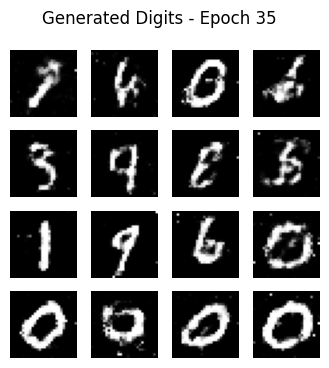

Epoch [36/50], Step [100/938], Loss D: 0.9453, Loss G: 1.3655
Epoch [36/50], Step [200/938], Loss D: 1.0042, Loss G: 1.0699
Epoch [36/50], Step [300/938], Loss D: 1.1458, Loss G: 1.3539
Epoch [36/50], Step [400/938], Loss D: 1.1180, Loss G: 1.0803
Epoch [36/50], Step [500/938], Loss D: 1.0146, Loss G: 1.1603
Epoch [36/50], Step [600/938], Loss D: 1.0719, Loss G: 1.0300
Epoch [36/50], Step [700/938], Loss D: 1.2397, Loss G: 1.1132
Epoch [36/50], Step [800/938], Loss D: 1.1216, Loss G: 1.3365
Epoch [36/50], Step [900/938], Loss D: 1.0196, Loss G: 1.0451
Epoch [37/50], Step [100/938], Loss D: 1.3021, Loss G: 1.2665
Epoch [37/50], Step [200/938], Loss D: 0.9655, Loss G: 1.5084
Epoch [37/50], Step [300/938], Loss D: 1.0134, Loss G: 1.2432
Epoch [37/50], Step [400/938], Loss D: 0.9041, Loss G: 1.4301
Epoch [37/50], Step [500/938], Loss D: 1.0602, Loss G: 1.2016
Epoch [37/50], Step [600/938], Loss D: 0.9459, Loss G: 1.2297
Epoch [37/50], Step [700/938], Loss D: 1.1365, Loss G: 1.2374
Epoch [3

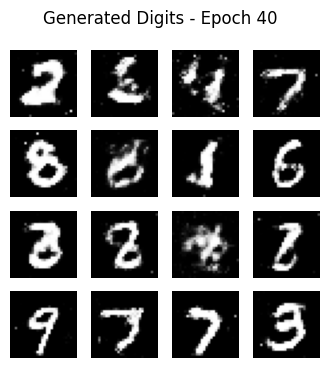

Epoch [41/50], Step [100/938], Loss D: 1.0467, Loss G: 1.1629
Epoch [41/50], Step [200/938], Loss D: 1.3422, Loss G: 1.1063
Epoch [41/50], Step [300/938], Loss D: 1.1271, Loss G: 1.1095
Epoch [41/50], Step [400/938], Loss D: 1.2134, Loss G: 1.0258
Epoch [41/50], Step [500/938], Loss D: 1.1765, Loss G: 1.1194
Epoch [41/50], Step [600/938], Loss D: 1.1752, Loss G: 1.1038
Epoch [41/50], Step [700/938], Loss D: 0.9412, Loss G: 1.2123
Epoch [41/50], Step [800/938], Loss D: 1.2420, Loss G: 1.0256
Epoch [41/50], Step [900/938], Loss D: 1.0966, Loss G: 1.2899
Epoch [42/50], Step [100/938], Loss D: 1.0751, Loss G: 1.1673
Epoch [42/50], Step [200/938], Loss D: 1.1749, Loss G: 1.1551
Epoch [42/50], Step [300/938], Loss D: 1.1304, Loss G: 1.4349
Epoch [42/50], Step [400/938], Loss D: 1.3693, Loss G: 0.9763
Epoch [42/50], Step [500/938], Loss D: 1.2223, Loss G: 1.2555
Epoch [42/50], Step [600/938], Loss D: 1.1944, Loss G: 1.1011
Epoch [42/50], Step [700/938], Loss D: 0.9997, Loss G: 1.2136
Epoch [4

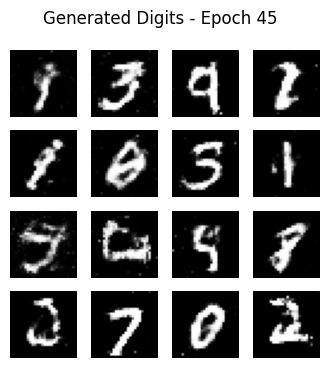

Epoch [46/50], Step [100/938], Loss D: 1.0198, Loss G: 1.0808
Epoch [46/50], Step [200/938], Loss D: 1.0557, Loss G: 1.0999
Epoch [46/50], Step [300/938], Loss D: 0.9961, Loss G: 1.1359
Epoch [46/50], Step [400/938], Loss D: 1.0460, Loss G: 1.3379
Epoch [46/50], Step [500/938], Loss D: 0.8748, Loss G: 1.2979
Epoch [46/50], Step [600/938], Loss D: 0.9263, Loss G: 1.1977
Epoch [46/50], Step [700/938], Loss D: 0.9831, Loss G: 1.3317
Epoch [46/50], Step [800/938], Loss D: 1.2551, Loss G: 1.0305
Epoch [46/50], Step [900/938], Loss D: 1.1265, Loss G: 1.0721
Epoch [47/50], Step [100/938], Loss D: 1.1034, Loss G: 1.0431
Epoch [47/50], Step [200/938], Loss D: 1.0547, Loss G: 1.0111
Epoch [47/50], Step [300/938], Loss D: 1.0383, Loss G: 0.9603
Epoch [47/50], Step [400/938], Loss D: 1.2815, Loss G: 0.9504
Epoch [47/50], Step [500/938], Loss D: 1.0544, Loss G: 1.2732
Epoch [47/50], Step [600/938], Loss D: 1.2512, Loss G: 1.0042
Epoch [47/50], Step [700/938], Loss D: 1.0246, Loss G: 1.3853
Epoch [4

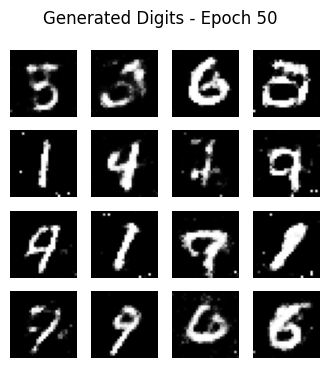

GAN Training Complete!


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
## 1. Setup and Data Loading (MNIST)
# ----------------------------------------------------------------------
# Define image transformation: Resize to 28x28, convert to tensor, normalize to [-1, 1]
# Normalizing to [-1, 1] is standard for GANs with Tanh output.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # Mean and std for single channel
])

# Load MNIST dataset
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(mnist_dataset, batch_size=64, shuffle=True)

# Hyperparameters
NOISE_DIM = 100 # Size of the random noise vector
IMAGE_DIM = 28 * 28 # 28x28 pixels
HIDDEN_DIM_G = 256 # Hidden layer size for Generator
HIDDEN_DIM_D = 256 # Hidden layer size for Discriminator
LR_G = 0.0002 # Learning rate for Generator
LR_D = 0.0002 # Learning rate for Discriminator
NUM_EPOCHS = 50

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------------------------------------------------------------
## 2. Generator Network (G)
# ----------------------------------------------------------------------
class Generator(nn.Module):
    def __init__(self, noise_dim, hidden_dim, image_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(noise_dim, hidden_dim), # Noise to hidden layer
            nn.LeakyReLU(0.2), # Non-linear activation
            nn.Linear(hidden_dim, hidden_dim * 2), # Another hidden layer
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim * 2, image_dim), # Output layer (to image size)
            nn.Tanh() # Scales pixel values to [-1, 1]
        )

    def forward(self, x):
        return self.net(x)

# ----------------------------------------------------------------------
## 3. Discriminator Network (D)
# ----------------------------------------------------------------------
class Discriminator(nn.Module):
    def __init__(self, image_dim, hidden_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(image_dim, hidden_dim * 2), # Input image (flattened) to hidden layer
            nn.LeakyReLU(0.2), # Non-linear activation
            nn.Dropout(0.3), # Dropout for regularization
            nn.Linear(hidden_dim * 2, hidden_dim), # Another hidden layer
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, 1), # Output (single logit for real/fake)
            nn.Sigmoid() # Binary classification probability (0 to 1)
        )

    def forward(self, x):
        return self.net(x)

# ----------------------------------------------------------------------
## 4. Instantiate Models, Loss, and Optimizers
# ----------------------------------------------------------------------
generator = Generator(NOISE_DIM, HIDDEN_DIM_G, IMAGE_DIM).to(device)
discriminator = Discriminator(IMAGE_DIM, HIDDEN_DIM_D).to(device)

# Binary Cross-Entropy is standard for GAN loss (real/fake classification)
criterion = nn.BCELoss()

# Optimizers for both networks (often Adam)
optimizer_G = optim.Adam(generator.parameters(), lr=LR_G)
optimizer_D = optim.Adam(discriminator.parameters(), lr=LR_D)

# Labels for training
real_labels = torch.ones(dataloader.batch_size, 1).to(device)
fake_labels = torch.zeros(dataloader.batch_size, 1).to(device)

# ----------------------------------------------------------------------
## 5. Training Loop
# ----------------------------------------------------------------------
print("Starting GAN Training...")
for epoch in range(NUM_EPOCHS):
    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.size(0)

        # Flatten the real images for the MLP Discriminator
        real_images = real_images.reshape(batch_size, -1).to(device) # Shape: [batch_size, 784]

        # --- Train Discriminator ---
        optimizer_D.zero_grad()

        # 1. Train with real images
        output_D_real = discriminator(real_images)
        loss_D_real = criterion(output_D_real, real_labels[:batch_size])

        # 2. Train with fake images
        noise = torch.randn(batch_size, NOISE_DIM).to(device) # Generate random noise
        fake_images = generator(noise).detach() # Generate fake images from noise, detach for D training
        output_D_fake = discriminator(fake_images)
        loss_D_fake = criterion(output_D_fake, fake_labels[:batch_size])

        # Combine D loss and update
        loss_D = loss_D_real + loss_D_fake
        loss_D.backward()
        optimizer_D.step()

        # --- Train Generator ---
        optimizer_G.zero_grad()

        # Generate new fake images
        noise = torch.randn(batch_size, NOISE_DIM).to(device)
        fake_images = generator(noise)
        output_G = discriminator(fake_images) # Discriminator's output on generator's images

        # G wants D to classify fake images as real (label 1)
        loss_G = criterion(output_G, real_labels[:batch_size])
        loss_G.backward()
        optimizer_G.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i+1}/{len(dataloader)}], "
                  f"Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}")

    # ----------------------------------------------------------------------
    ## 6. Visualization during Training (Generate and Show Samples)
    # ----------------------------------------------------------------------
    if (epoch + 1) % 5 == 0: # Save sample images every few epochs
        with torch.no_grad():
            # Generate a fixed set of sample images for consistent evaluation
            fixed_noise = torch.randn(16, NOISE_DIM).to(device)
            generated_samples = generator(fixed_noise).cpu().view(-1, 1, 28, 28) # Reshape to image format

            fig = plt.figure(figsize=(4, 4))
            for k in range(generated_samples.size(0)):
                plt.subplot(4, 4, k+1)
                # Un-normalize the images for display
                plt.imshow((generated_samples[k] * 0.5 + 0.5).squeeze(), cmap='gray')
                plt.axis('off')
            fig.suptitle(f"Generated Digits - Epoch {epoch+1}")
            plt.show()

print("GAN Training Complete!")